In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
plays_csv = files.upload()

Saving plays.csv to plays (1).csv


In [ ]:
plays_org = pd.read_csv('/content/plays.csv')
pd.set_option('display.max_columns', None)

Starting off with the 'Plays.csv' file as it seems to provide an overview or a basic framework that I am looking for

In [ ]:
plays_org.head()

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,ATL,41,7:52,21,7,C,6.0,NaN,9,9,N,69,SHOTGUN,7.0,0.747284,0.976785,0.023215,-0.006110,0.006110,2.360609,0.981955,NaN,NaN,NaN,NaN
1,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,PIT,34,7:38,14,20,NaN,NaN,NaN,3,3,N,76,SHOTGUN,7.0,0.416454,0.160485,0.839515,-0.010865,0.010865,1.733344,-0.263424,NaN,NaN,NaN,NaN
2,2022091111,1148,42547,Darren Waller,(8:57) D.Carr pass short middle to D.Waller to...,2,2,5,LV,LAC,LV,30,8:57,10,3,C,11.0,NaN,15,15,N,40,I_FORM,6.0,0.267933,0.756661,0.243339,-0.037409,0.037409,1.312855,1.133666,NaN,NaN,NaN,NaN
3,2022100212,2007,46461,Mike Boone,(13:12) M.Boone left tackle to DEN 44 for 7 ya...,3,2,10,DEN,LV,DEN,37,13:12,19,16,NaN,NaN,NaN,7,7,N,47,SINGLEBACK,6.0,0.592704,0.620552,0.379448,-0.002451,0.002451,1.641006,-0.043580,NaN,NaN,NaN,NaN
4,2022091900,1372,47857,Devin Singletary,(8:33) D.Singletary right guard to TEN 32 for ...,2,1,10,BUF,TEN,TEN,35,8:33,7,7,NaN,NaN,NaN,3,3,N,75,I_FORM,7.0,0.470508,0.836290,0.163710,0.001053,-0.001053,3.686428,-0.167903,NaN,NaN,NaN,NaN


# EDA and Feature Engineering

Non factual data. Probably not useful in the long run

In [ ]:
plays_org = plays_org.drop(['ballCarrierDisplayName','playDescription'], axis = 1)

In [ ]:
plays_org.shape

(12486, 33)

Reducing 'quarter' and 'gameClock' to a single column.

In [ ]:
def time_conversions(time_str):
    minutes, seconds = map(int, time_str.split(':'))
    return (minutes * 60) + seconds

In [ ]:
plays_org['TimeInSec'] = plays_org['gameClock'].apply(time_conversions) + ((plays_org.quarter - 1) * 60 * 15)
plays_org.TimeInSec.head()

0    3172
1    3158
2    1437
3    2592
4    1413
Name: TimeInSec, dtype: int64

Additional columns with non factual data.

In [ ]:
plays_org = plays_org.drop(['gameClock','quarter','possessionTeam', 'defensiveTeam', 'yardlineSide', 'yardlineNumber'], axis = 1)

Evaluating percentage of missing values

In [ ]:
not_available = plays_org['passResult'].isna().sum()
total_rows = plays_org.shape[0]
#print(not_available)
print('Percentge of nan values in Pass Result= ', not_available * 100 / total_rows, '%')
print('Percentage of nan values in Pass length', plays_org['passLength'].isna().sum())
print('Percentage of nan values in Penalty Yards', plays_org['penaltyYards'].isna().sum())


Percentge of nan values in Pass Result=  51.10523786641038 %
Percentage of nan values in Pass length 6852
Percentage of nan values in Penalty Yards 11871


Mirror column by the name homeTeamWinProbabilityAdded

In [ ]:
plays_org = plays_org.drop('visitorTeamWinProbilityAdded', axis=1)
plays_org.head()

,gameId,playId,ballCarrierId,down,yardsToGo,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,TimeInSec
0,2022100908,3537,48723,1,10,21,7,C,6.0,NaN,9,9,N,69,SHOTGUN,7.0,0.747284,0.976785,0.023215,-0.006110,2.360609,0.981955,NaN,NaN,NaN,NaN,3172
1,2022091103,3126,52457,1,10,14,20,NaN,NaN,NaN,3,3,N,76,SHOTGUN,7.0,0.416454,0.160485,0.839515,-0.010865,1.733344,-0.263424,NaN,NaN,NaN,NaN,3158
2,2022091111,1148,42547,2,5,10,3,C,11.0,NaN,15,15,N,40,I_FORM,6.0,0.267933,0.756661,0.243339,-0.037409,1.312855,1.133666,NaN,NaN,NaN,NaN,1437
3,2022100212,2007,46461,2,10,19,16,NaN,NaN,NaN,7,7,N,47,SINGLEBACK,6.0,0.592704,0.620552,0.379448,-0.002451,1.641006,-0.043580,NaN,NaN,NaN,NaN,2592
4,2022091900,1372,47857,1,10,7,7,NaN,NaN,NaN,3,3,N,75,I_FORM,7.0,0.470508,0.836290,0.163710,0.001053,3.686428,-0.167903,NaN,NaN,NaN,NaN,1413


In [ ]:
plays_org = plays_org.drop('preSnapVisitorTeamWinProbability',axis=1)

In [ ]:
plays_org.head()

,gameId,playId,ballCarrierId,down,yardsToGo,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,homeTeamWinProbabilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,TimeInSec
0,2022100908,3537,48723,1,10,21,7,C,6.0,NaN,9,9,N,69,SHOTGUN,7.0,0.747284,0.976785,-0.006110,2.360609,0.981955,NaN,NaN,NaN,NaN,3172
1,2022091103,3126,52457,1,10,14,20,NaN,NaN,NaN,3,3,N,76,SHOTGUN,7.0,0.416454,0.160485,-0.010865,1.733344,-0.263424,NaN,NaN,NaN,NaN,3158
2,2022091111,1148,42547,2,5,10,3,C,11.0,NaN,15,15,N,40,I_FORM,6.0,0.267933,0.756661,-0.037409,1.312855,1.133666,NaN,NaN,NaN,NaN,1437
3,2022100212,2007,46461,2,10,19,16,NaN,NaN,NaN,7,7,N,47,SINGLEBACK,6.0,0.592704,0.620552,-0.002451,1.641006,-0.043580,NaN,NaN,NaN,NaN,2592
4,2022091900,1372,47857,1,10,7,7,NaN,NaN,NaN,3,3,N,75,I_FORM,7.0,0.470508,0.836290,0.001053,3.686428,-0.167903,NaN,NaN,NaN,NaN,1413


In [ ]:
print(plays_org.foulName1.dtype)
print(plays_org.foulName2.dtype)
print(plays_org.foulNFLId1.dtype)
print(plays_org.foulNFLId2.dtype)

object
object
float64
float64


In [ ]:
plays_org.foulName1.value_counts()

Offensive Holding                  210
Defensive Offside                   57
Defensive Holding                   51
Unnecessary Roughness               42
Ineligible Downfield Pass           42
Offensive Pass Interference         28
Face Mask                           28
Illegal Use of Hands                20
Roughing the Passer                 19
Illegal Contact                     18
Illegal Block Above the Waist       18
Illegal Formation                   13
Unsportsmanlike Conduct              9
Taunting                             6
Low Block                            6
Horse Collar Tackle                  5
Illegal Shift                        4
Disqualification                     3
Tripping                             3
Chop Block                           3
Illegal Motion                       2
Defensive Pass Interference          2
Illegal Blindside Block              1
Defensive Too Many Men on Field      1
Illegal Forward Pass                 1
Name: foulName1, dtype: i

Too many dummy variables. Dropping the foul columns as they focus on describing the type of fould commited and doesn't contribute to the score card.

In [ ]:
plays_org = plays_org.drop(['foulName1','foulName2','foulNFLId1','foulNFLId2'], axis=1)
plays_org.head()

,gameId,playId,ballCarrierId,down,yardsToGo,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,homeTeamWinProbabilityAdded,expectedPoints,expectedPointsAdded,TimeInSec
0,2022100908,3537,48723,1,10,21,7,C,6.0,NaN,9,9,N,69,SHOTGUN,7.0,0.747284,0.976785,-0.006110,2.360609,0.981955,3172
1,2022091103,3126,52457,1,10,14,20,NaN,NaN,NaN,3,3,N,76,SHOTGUN,7.0,0.416454,0.160485,-0.010865,1.733344,-0.263424,3158
2,2022091111,1148,42547,2,5,10,3,C,11.0,NaN,15,15,N,40,I_FORM,6.0,0.267933,0.756661,-0.037409,1.312855,1.133666,1437
3,2022100212,2007,46461,2,10,19,16,NaN,NaN,NaN,7,7,N,47,SINGLEBACK,6.0,0.592704,0.620552,-0.002451,1.641006,-0.043580,2592
4,2022091900,1372,47857,1,10,7,7,NaN,NaN,NaN,3,3,N,75,I_FORM,7.0,0.470508,0.836290,0.001053,3.686428,-0.167903,1413


In [ ]:
print(plays_org.offenseFormation.value_counts())

SHOTGUN       6378
SINGLEBACK    3524
I_FORM         929
EMPTY          850
PISTOL         599
JUMBO          115
WILDCAT         87
Name: offenseFormation, dtype: int64


# Note to self
The number of formmations can be converted to dummies, however, they would be effective only after the introduction of a tackle column in the table.
1. The idea would be to analyze the effectiveness of a formation based on its tackle success rate or somethign like that ig.
2. The pass result showing empty values can be changed to incomplete (Take another look at the datasets)
3. Hold on to the playId and gameId, may be helpful to merge additional data to the dataset

Get Dummies for
1. Pass Result
2. Formation

Check if Pre Penalty result and post penalty result are effectively the same column

Map penalty administerd to 0 and 1



In [ ]:
print(plays_org['playNullifiedByPenalty'].dtype)
print(plays_org['playNullifiedByPenalty'].isna().sum())


object
0


In [ ]:
def penalty_administered(pen_str):
    if pen_str == 'N':
        return 0
    else:
        return 1

In [ ]:
plays_org['playNullifiedByPenalty'] = plays_org['playNullifiedByPenalty'].apply(penalty_administered)

In [ ]:
plays_org.head()

,gameId,playId,ballCarrierId,down,yardsToGo,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,homeTeamWinProbabilityAdded,expectedPoints,expectedPointsAdded,TimeInSec
0,2022100908,3537,48723,1,10,21,7,C,6.0,NaN,9,9,0,69,SHOTGUN,7.0,0.747284,0.976785,-0.006110,2.360609,0.981955,3172
1,2022091103,3126,52457,1,10,14,20,NaN,NaN,NaN,3,3,0,76,SHOTGUN,7.0,0.416454,0.160485,-0.010865,1.733344,-0.263424,3158
2,2022091111,1148,42547,2,5,10,3,C,11.0,NaN,15,15,0,40,I_FORM,6.0,0.267933,0.756661,-0.037409,1.312855,1.133666,1437
3,2022100212,2007,46461,2,10,19,16,NaN,NaN,NaN,7,7,0,47,SINGLEBACK,6.0,0.592704,0.620552,-0.002451,1.641006,-0.043580,2592
4,2022091900,1372,47857,1,10,7,7,NaN,NaN,NaN,3,3,0,75,I_FORM,7.0,0.470508,0.836290,0.001053,3.686428,-0.167903,1413


In [ ]:
print(plays_org.penaltyYards.dtype)
print(plays_org.penaltyYards.isna().sum())


float64
11871


In [ ]:
plays_org.penaltyYards = plays_org.penaltyYards.fillna(0)

In [ ]:
plays_org.head()

,gameId,playId,ballCarrierId,down,yardsToGo,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,homeTeamWinProbabilityAdded,expectedPoints,expectedPointsAdded,TimeInSec
0,2022100908,3537,48723,1,10,21,7,C,6.0,0.0,9,9,0,69,SHOTGUN,7.0,0.747284,0.976785,-0.006110,2.360609,0.981955,3172
1,2022091103,3126,52457,1,10,14,20,NaN,NaN,0.0,3,3,0,76,SHOTGUN,7.0,0.416454,0.160485,-0.010865,1.733344,-0.263424,3158
2,2022091111,1148,42547,2,5,10,3,C,11.0,0.0,15,15,0,40,I_FORM,6.0,0.267933,0.756661,-0.037409,1.312855,1.133666,1437
3,2022100212,2007,46461,2,10,19,16,NaN,NaN,0.0,7,7,0,47,SINGLEBACK,6.0,0.592704,0.620552,-0.002451,1.641006,-0.043580,2592
4,2022091900,1372,47857,1,10,7,7,NaN,NaN,0.0,3,3,0,75,I_FORM,7.0,0.470508,0.836290,0.001053,3.686428,-0.167903,1413


In [ ]:
plays_org.passResult = plays_org.passResult.fillna('I')
plays_org.passLength = plays_org.passLength.fillna(0)

In [ ]:
plays_org.head()

,gameId,playId,ballCarrierId,down,yardsToGo,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,homeTeamWinProbabilityAdded,expectedPoints,expectedPointsAdded,TimeInSec
0,2022100908,3537,48723,1,10,21,7,C,6.0,0.0,9,9,0,69,SHOTGUN,7.0,0.747284,0.976785,-0.006110,2.360609,0.981955,3172
1,2022091103,3126,52457,1,10,14,20,I,0.0,0.0,3,3,0,76,SHOTGUN,7.0,0.416454,0.160485,-0.010865,1.733344,-0.263424,3158
2,2022091111,1148,42547,2,5,10,3,C,11.0,0.0,15,15,0,40,I_FORM,6.0,0.267933,0.756661,-0.037409,1.312855,1.133666,1437
3,2022100212,2007,46461,2,10,19,16,I,0.0,0.0,7,7,0,47,SINGLEBACK,6.0,0.592704,0.620552,-0.002451,1.641006,-0.043580,2592
4,2022091900,1372,47857,1,10,7,7,I,0.0,0.0,3,3,0,75,I_FORM,7.0,0.470508,0.836290,0.001053,3.686428,-0.167903,1413


In [ ]:
store_list = plays_org.prePenaltyPlayResult == plays_org.playResult


In [ ]:
count = 0
for i in range(0, len(store_list)):
    if store_list[i] == False:
        count += 1
print(count)
print('Percentage of same values in both the colunms is = ', count * 100 / len(plays_org.prePenaltyPlayResult), '%')

539
Percentage of same values in both the colunms is =  4.3168348550376425 %


The percentage of similar values is low and can be dropped to reduce the number of columns, however, it may cost us the loss of information as at this stage of EDA we aren't aware about the tackle value.

### Dummy variables gen (Formation, Pass result)
### Integrate tackle with existing dataset (Prediction varible)
### Integrate player data (height of the player, wieght of the player)
##### Football is the physical sport and this evaluation may be insightful
### Also try to integrate the y - axis positioning, speed, acceleration and the angle of orientation of the player

In [ ]:
formation_dummies = pd.get_dummies(plays_org.offenseFormation)
plays_org = pd.concat([plays_org,formation_dummies], axis = 1)
plays_org.head()

,gameId,playId,ballCarrierId,down,yardsToGo,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,homeTeamWinProbabilityAdded,expectedPoints,expectedPointsAdded,TimeInSec,EMPTY,I_FORM,JUMBO,PISTOL,SHOTGUN,SINGLEBACK,WILDCAT
0,2022100908,3537,48723,1,10,21,7,C,6.0,0.0,9,9,0,69,SHOTGUN,7.0,0.747284,0.976785,-0.006110,2.360609,0.981955,3172,0,0,0,0,1,0,0
1,2022091103,3126,52457,1,10,14,20,I,0.0,0.0,3,3,0,76,SHOTGUN,7.0,0.416454,0.160485,-0.010865,1.733344,-0.263424,3158,0,0,0,0,1,0,0
2,2022091111,1148,42547,2,5,10,3,C,11.0,0.0,15,15,0,40,I_FORM,6.0,0.267933,0.756661,-0.037409,1.312855,1.133666,1437,0,1,0,0,0,0,0
3,2022100212,2007,46461,2,10,19,16,I,0.0,0.0,7,7,0,47,SINGLEBACK,6.0,0.592704,0.620552,-0.002451,1.641006,-0.043580,2592,0,0,0,0,0,1,0
4,2022091900,1372,47857,1,10,7,7,I,0.0,0.0,3,3,0,75,I_FORM,7.0,0.470508,0.836290,0.001053,3.686428,-0.167903,1413,0,1,0,0,0,0,0


In [ ]:
plays_org = plays_org.drop('offenseFormation', axis = 1)
plays_org.head()

,gameId,playId,ballCarrierId,down,yardsToGo,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,homeTeamWinProbabilityAdded,expectedPoints,expectedPointsAdded,TimeInSec,EMPTY,I_FORM,JUMBO,PISTOL,SHOTGUN,SINGLEBACK,WILDCAT
0,2022100908,3537,48723,1,10,21,7,C,6.0,0.0,9,9,0,69,7.0,0.747284,0.976785,-0.006110,2.360609,0.981955,3172,0,0,0,0,1,0,0
1,2022091103,3126,52457,1,10,14,20,I,0.0,0.0,3,3,0,76,7.0,0.416454,0.160485,-0.010865,1.733344,-0.263424,3158,0,0,0,0,1,0,0
2,2022091111,1148,42547,2,5,10,3,C,11.0,0.0,15,15,0,40,6.0,0.267933,0.756661,-0.037409,1.312855,1.133666,1437,0,1,0,0,0,0,0
3,2022100212,2007,46461,2,10,19,16,I,0.0,0.0,7,7,0,47,6.0,0.592704,0.620552,-0.002451,1.641006,-0.043580,2592,0,0,0,0,0,1,0
4,2022091900,1372,47857,1,10,7,7,I,0.0,0.0,3,3,0,75,7.0,0.470508,0.836290,0.001053,3.686428,-0.167903,1413,0,1,0,0,0,0,0


In [ ]:
pass_result_dummies = pd.get_dummies(plays_org.passResult)

In [ ]:
plays_org = pd.concat([plays_org,pass_result_dummies], axis=1)
plays_org = plays_org.drop('passResult', axis=1)
plays_org.head()

,gameId,playId,ballCarrierId,down,yardsToGo,preSnapHomeScore,preSnapVisitorScore,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,homeTeamWinProbabilityAdded,expectedPoints,expectedPointsAdded,TimeInSec,EMPTY,I_FORM,JUMBO,PISTOL,SHOTGUN,SINGLEBACK,WILDCAT,C,I,R
0,2022100908,3537,48723,1,10,21,7,6.0,0.0,9,9,0,69,7.0,0.747284,0.976785,-0.006110,2.360609,0.981955,3172,0,0,0,0,1,0,0,1,0,0
1,2022091103,3126,52457,1,10,14,20,0.0,0.0,3,3,0,76,7.0,0.416454,0.160485,-0.010865,1.733344,-0.263424,3158,0,0,0,0,1,0,0,0,1,0
2,2022091111,1148,42547,2,5,10,3,11.0,0.0,15,15,0,40,6.0,0.267933,0.756661,-0.037409,1.312855,1.133666,1437,0,1,0,0,0,0,0,1,0,0
3,2022100212,2007,46461,2,10,19,16,0.0,0.0,7,7,0,47,6.0,0.592704,0.620552,-0.002451,1.641006,-0.043580,2592,0,0,0,0,0,1,0,0,1,0
4,2022091900,1372,47857,1,10,7,7,0.0,0.0,3,3,0,75,7.0,0.470508,0.836290,0.001053,3.686428,-0.167903,1413,0,1,0,0,0,0,0,0,1,0


# Tackle Imported

In [ ]:
tackle_csv = files.upload()

In [ ]:
tackle_org = pd.read_csv("/content/tackles.csv")
#print(tackle_org.describe())
tackle_org.head()

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle
0,2022090800,101,42816,1,0,0,0
1,2022090800,393,46232,1,0,0,0
2,2022090800,486,40166,1,0,0,0
3,2022090800,646,47939,1,0,0,0
4,2022090800,818,40107,1,0,0,0


In [ ]:
p1 = plays_org.shape[0]
p2 = tackle_org.shape[0]
print(p1 > p2)
print(p1,'  ', p2)

False
12486    17426


In [ ]:
tackle_org.drop_duplicates
print(tackle_org.shape[0])

17426


In [ ]:
tackle_org.isna().sum()

gameId              0
playId              0
nflId               0
tackle              0
assist              0
forcedFumble        0
pff_missedTackle    0
dtype: int64

In [ ]:
plays_org['tackle'] = 0

In [ ]:
plays_org.head()

,gameId,playId,ballCarrierId,down,yardsToGo,preSnapHomeScore,preSnapVisitorScore,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,homeTeamWinProbabilityAdded,expectedPoints,expectedPointsAdded,TimeInSec,EMPTY,I_FORM,JUMBO,PISTOL,SHOTGUN,SINGLEBACK,WILDCAT,C,I,R,tackle
0,2022100908,3537,48723,1,10,21,7,6.0,0.0,9,9,0,69,7.0,0.747284,0.976785,-0.006110,2.360609,0.981955,3172,0,0,0,0,1,0,0,1,0,0,0
1,2022091103,3126,52457,1,10,14,20,0.0,0.0,3,3,0,76,7.0,0.416454,0.160485,-0.010865,1.733344,-0.263424,3158,0,0,0,0,1,0,0,0,1,0,0
2,2022091111,1148,42547,2,5,10,3,11.0,0.0,15,15,0,40,6.0,0.267933,0.756661,-0.037409,1.312855,1.133666,1437,0,1,0,0,0,0,0,1,0,0,0
3,2022100212,2007,46461,2,10,19,16,0.0,0.0,7,7,0,47,6.0,0.592704,0.620552,-0.002451,1.641006,-0.043580,2592,0,0,0,0,0,1,0,0,1,0,0
4,2022091900,1372,47857,1,10,7,7,0.0,0.0,3,3,0,75,7.0,0.470508,0.836290,0.001053,3.686428,-0.167903,1413,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
tackle_playId_list = tackle_org['playId']
tackel_gameId_list = tackle_org['gameId']

plays_playID_list = plays_org['playId']
plays_gameId_list = plays_org['gameId']

print(len(tackle_playId_list), ', ', len(plays_gameId_list))

17426 ,  12486


In [ ]:
print('Entries in tackle playId ',len(tackle_playId_list.unique()))
print('Entries in tackle gameId ',len(tackel_gameId_list.unique()))
print('Entries in plays playId ',len(plays_playID_list.unique()))
print('Entries in plays gameId ',len(plays_gameId_list.unique()))

Entries in tackle playId  3943
Entries in tackle gameId  136
Entries in plays playId  3974
Entries in plays gameId  136


In [ ]:
#for i in range(0, len(tackle_playId_list)):
#    for j in range(0, len(plays_playID_list)):
#        if tackle_playId_list[i] == plays_playID_list[j] and tackel_gameId_list[i] == plays_gameId_list[j]:
#            plays_org['tackle'][j] = 1


#plays_org['tackle'].value_counts()

print(plays_org['gameId'].max())
print(plays_org['gameId'].min())

print(plays_org['playId'].max())
print(plays_org['playId'].min())

2022110700
2022090800
5096
54


In [ ]:
plays_org['uniqueId'] = (plays_org['gameId'] * 10000) + plays_org['playId']
tackle_org['uniqueId'] = (tackle_org['gameId'] * 10000) + tackle_org['playId']

In [ ]:
print(len(tackle_org['uniqueId']))
len(tackle_org['uniqueId'].unique())

17426


12025

In [ ]:
print(len(plays_org['uniqueId']))
len(plays_org['uniqueId'].unique())

12486


12486

In [ ]:
len(set(tackle_org['uniqueId']).intersection(plays_org['uniqueId']))

12025

In [ ]:
#for i in range(0, len(tackle_org['uniqueId'])):
#    if tackle_org['uniqueId'][i] in plays_org['uniqueId']:
#        plays_org['tackle'] = 1

#plays_org['tackle'].value_counts()

In [ ]:
plays_org['tackle'] = plays_org['uniqueId'].isin(tackle_org['uniqueId']).astype(int)

In [ ]:
plays_org.head()

,gameId,playId,ballCarrierId,down,yardsToGo,preSnapHomeScore,preSnapVisitorScore,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,homeTeamWinProbabilityAdded,expectedPoints,expectedPointsAdded,TimeInSec,EMPTY,I_FORM,JUMBO,PISTOL,SHOTGUN,SINGLEBACK,WILDCAT,C,I,R,tackle,uniqueId
0,2022100908,3537,48723,1,10,21,7,6.0,0.0,9,9,0,69,7.0,0.747284,0.976785,-0.006110,2.360609,0.981955,3172,0,0,0,0,1,0,0,1,0,0,1,20221009083537
1,2022091103,3126,52457,1,10,14,20,0.0,0.0,3,3,0,76,7.0,0.416454,0.160485,-0.010865,1.733344,-0.263424,3158,0,0,0,0,1,0,0,0,1,0,1,20220911033126
2,2022091111,1148,42547,2,5,10,3,11.0,0.0,15,15,0,40,6.0,0.267933,0.756661,-0.037409,1.312855,1.133666,1437,0,1,0,0,0,0,0,1,0,0,1,20220911111148
3,2022100212,2007,46461,2,10,19,16,0.0,0.0,7,7,0,47,6.0,0.592704,0.620552,-0.002451,1.641006,-0.043580,2592,0,0,0,0,0,1,0,0,1,0,1,20221002122007
4,2022091900,1372,47857,1,10,7,7,0.0,0.0,3,3,0,75,7.0,0.470508,0.836290,0.001053,3.686428,-0.167903,1413,0,1,0,0,0,0,0,0,1,0,1,20220919001372


In [ ]:
plays_org['tackle'].value_counts()

1    12025
0      461
Name: tackle, dtype: int64

The set is very imbalanced thus, using decision tree as it is known to be more robust to such sets.

# Tackles added

In [ ]:
plays_org = plays_org.drop(['gameId','playId'], axis=1)
plays_org.head()

,ballCarrierId,down,yardsToGo,preSnapHomeScore,preSnapVisitorScore,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,homeTeamWinProbabilityAdded,expectedPoints,expectedPointsAdded,TimeInSec,EMPTY,I_FORM,JUMBO,PISTOL,SHOTGUN,SINGLEBACK,WILDCAT,C,I,R,tackle,uniqueId
0,48723,1,10,21,7,6.0,0.0,9,9,0,69,7.0,0.747284,0.976785,-0.006110,2.360609,0.981955,3172,0,0,0,0,1,0,0,1,0,0,1,20221009083537
1,52457,1,10,14,20,0.0,0.0,3,3,0,76,7.0,0.416454,0.160485,-0.010865,1.733344,-0.263424,3158,0,0,0,0,1,0,0,0,1,0,1,20220911033126
2,42547,2,5,10,3,11.0,0.0,15,15,0,40,6.0,0.267933,0.756661,-0.037409,1.312855,1.133666,1437,0,1,0,0,0,0,0,1,0,0,1,20220911111148
3,46461,2,10,19,16,0.0,0.0,7,7,0,47,6.0,0.592704,0.620552,-0.002451,1.641006,-0.043580,2592,0,0,0,0,0,1,0,0,1,0,1,20221002122007
4,47857,1,10,7,7,0.0,0.0,3,3,0,75,7.0,0.470508,0.836290,0.001053,3.686428,-0.167903,1413,0,1,0,0,0,0,0,0,1,0,1,20220919001372


# Adding Players.csv

In [ ]:
players_csv = files.upload()

In [ ]:
players_org = pd.read_csv("/content/players.csv")
players_org.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan


In [ ]:
print(players_org.shape[0])

1683


In [ ]:
players_org['height'].dtype

dtype('O')

In [ ]:
def height_converter(height_str):
    feet, inches = map(int, height_str.split('-'))
    return feet * 12 + inches


In [ ]:
players_org['height'] = players_org['height'].apply(height_converter)

In [ ]:
players_org.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,76,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,76,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,74,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,78,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,76,217,1985-05-17,Boston College,QB,Matt Ryan


In [ ]:
len(players_org['position'].unique())

19

In [ ]:
len(players_org['collegeName'].unique())

226

In [ ]:
len(set(players_org['nflId']).intersection(plays_org['ballCarrierId']))

480

In [ ]:
len(plays_org['ballCarrierId'].unique())

480

In [ ]:
plays_org['ballCarrierId'].dtype

dtype('int64')

In [ ]:
players_org['nflId'].dtype

dtype('int64')

In [ ]:
plays_org['carrierWeight'] = 0
plays_org['carrierHeight'] = 0

plays_org['carrierHeight'] = plays_org['ballCarrierId'].map(players_org.set_index('nflId')['height'])
plays_org['carrierWeight'] = plays_org['ballCarrierId'].map(players_org.set_index('nflId')['weight'])

plays_org.head()


,ballCarrierId,down,yardsToGo,preSnapHomeScore,preSnapVisitorScore,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,homeTeamWinProbabilityAdded,expectedPoints,expectedPointsAdded,TimeInSec,EMPTY,I_FORM,JUMBO,PISTOL,SHOTGUN,SINGLEBACK,WILDCAT,C,I,R,tackle,uniqueId,carrierWeight,carrierHeight
0,48723,1,10,21,7,6.0,0.0,9,9,0,69,7.0,0.747284,0.976785,-0.006110,2.360609,0.981955,3172,0,0,0,0,1,0,0,1,0,0,1,20221009083537,261,75
1,52457,1,10,14,20,0.0,0.0,3,3,0,76,7.0,0.416454,0.160485,-0.010865,1.733344,-0.263424,3158,0,0,0,0,1,0,0,0,1,0,1,20220911033126,227,76
2,42547,2,5,10,3,11.0,0.0,15,15,0,40,6.0,0.267933,0.756661,-0.037409,1.312855,1.133666,1437,0,1,0,0,0,0,0,1,0,0,1,20220911111148,255,78
3,46461,2,10,19,16,0.0,0.0,7,7,0,47,6.0,0.592704,0.620552,-0.002451,1.641006,-0.043580,2592,0,0,0,0,0,1,0,0,1,0,1,20221002122007,205,70
4,47857,1,10,7,7,0.0,0.0,3,3,0,75,7.0,0.470508,0.836290,0.001053,3.686428,-0.167903,1413,0,1,0,0,0,0,0,0,1,0,1,20220919001372,203,67


In [ ]:
players_org['birthDate'].dtype

dtype('O')

In [ ]:
players_org['birthDate'] = pd.to_datetime(players_org['birthDate'])

In [ ]:
players_org['age'] = 2022 - players_org['birthDate'].dt.year
players_org['age'].head

<bound method NDFrame.head of 0       45.0
1       40.0
2       39.0
3       38.0
4       37.0
        ... 
1678     NaN
1679     NaN
1680     NaN
1681     NaN
1682     NaN
Name: age, Length: 1683, dtype: float64>

In [ ]:
players_org['age'].describe()

count    1204.000000
mean       27.467608
std         2.751216
min        23.000000
25%        25.000000
50%        27.000000
75%        29.000000
max        45.000000
Name: age, dtype: float64

In [ ]:
players_org['age'].mode()

0    27.0
Name: age, dtype: float64

In [ ]:
players_org['age'] = players_org['age'].fillna(27)

players_org


,nflId,height,weight,birthDate,collegeName,position,displayName,age
0,25511,76,225,1977-08-03,Michigan,QB,Tom Brady,45.0
1,29550,76,328,1982-01-22,Arkansas,T,Jason Peters,40.0
2,29851,74,225,1983-12-02,California,QB,Aaron Rodgers,39.0
3,30842,78,267,1984-05-19,UCLA,TE,Marcedes Lewis,38.0
4,33084,76,217,1985-05-17,Boston College,QB,Matt Ryan,37.0
...,...,...,...,...,...,...,...,...
1678,55200,78,266,NaT,Indiana,DT,Ryder Anderson,27.0
1679,55212,72,230,NaT,Iowa State,ILB,Jake Hummel,27.0
1680,55239,74,300,NaT,Pennsylvania,DT,Prince Emili,27.0
1681,55240,73,185,NaT,Buffalo,CB,Ja'Marcus Ingram,27.0


In [ ]:
players_org['age'].isna().sum()

0

In [ ]:
plays_org['carrierAge'] = 0

plays_org['carrierAge'] = plays_org['ballCarrierId'].map(players_org.set_index('nflId')['age'])
plays_org.head()


,ballCarrierId,down,yardsToGo,preSnapHomeScore,preSnapVisitorScore,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,homeTeamWinProbabilityAdded,expectedPoints,expectedPointsAdded,TimeInSec,EMPTY,I_FORM,JUMBO,PISTOL,SHOTGUN,SINGLEBACK,WILDCAT,C,I,R,tackle,uniqueId,carrierWeight,carrierHeight,carrierAge
0,48723,1,10,21,7,6.0,0.0,9,9,0,69,7.0,0.747284,0.976785,-0.006110,2.360609,0.981955,3172,0,0,0,0,1,0,0,1,0,0,1,20221009083537,261,75,27.0
1,52457,1,10,14,20,0.0,0.0,3,3,0,76,7.0,0.416454,0.160485,-0.010865,1.733344,-0.263424,3158,0,0,0,0,1,0,0,0,1,0,1,20220911033126,227,76,24.0
2,42547,2,5,10,3,11.0,0.0,15,15,0,40,6.0,0.267933,0.756661,-0.037409,1.312855,1.133666,1437,0,1,0,0,0,0,0,1,0,0,1,20220911111148,255,78,30.0
3,46461,2,10,19,16,0.0,0.0,7,7,0,47,6.0,0.592704,0.620552,-0.002451,1.641006,-0.043580,2592,0,0,0,0,0,1,0,0,1,0,1,20221002122007,205,70,27.0
4,47857,1,10,7,7,0.0,0.0,3,3,0,75,7.0,0.470508,0.836290,0.001053,3.686428,-0.167903,1413,0,1,0,0,0,0,0,0,1,0,1,20220919001372,203,67,25.0


# Data Visualization


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = plays_org
df = df.drop('ballCarrierId', axis = 1)


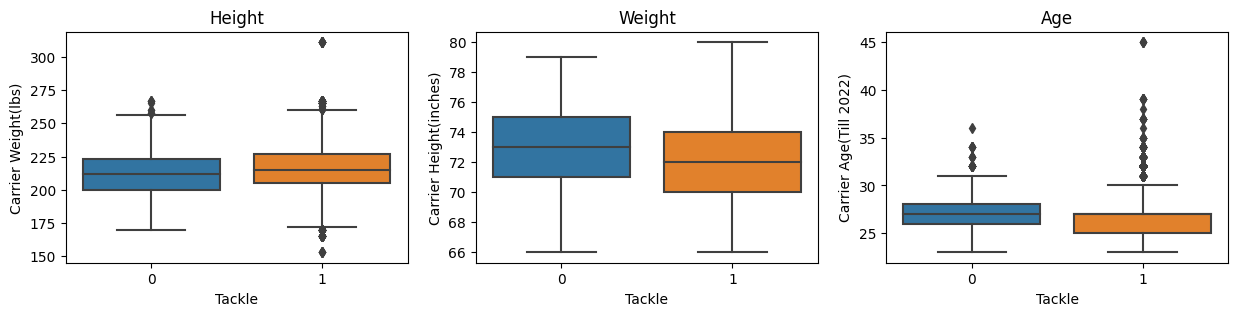

In [ ]:
data = pd.DataFrame({'Weight': df.carrierWeight, 'Binary Variable': df.tackle})
data2 = pd.DataFrame({'Weight': df.carrierHeight, 'Binary Variable': df.tackle})
data3 = pd.DataFrame({'Weight': df.carrierAge, 'Binary Variable': df.tackle})

# Plotting a violin plot
plt.figure(figsize=(15, 3))

plt.subplot(1,3,1)
sns.boxplot(x='Binary Variable', y='Weight', data=data)
plt.xlabel('Tackle')
plt.ylabel('Carrier Weight(lbs)')
plt.title('Height')

plt.subplot(1,3,2)
sns.boxplot(x='Binary Variable', y='Weight', data=data2)
plt.xlabel('Tackle')
plt.ylabel('Carrier Height(inches)')
plt.title('Weight')

plt.subplot(1,3,3)
sns.boxplot(x='Binary Variable', y='Weight', data=data3)
plt.xlabel('Tackle')
plt.ylabel('Carrier Age(Till 2022)')
plt.title('Age')

plt.show()

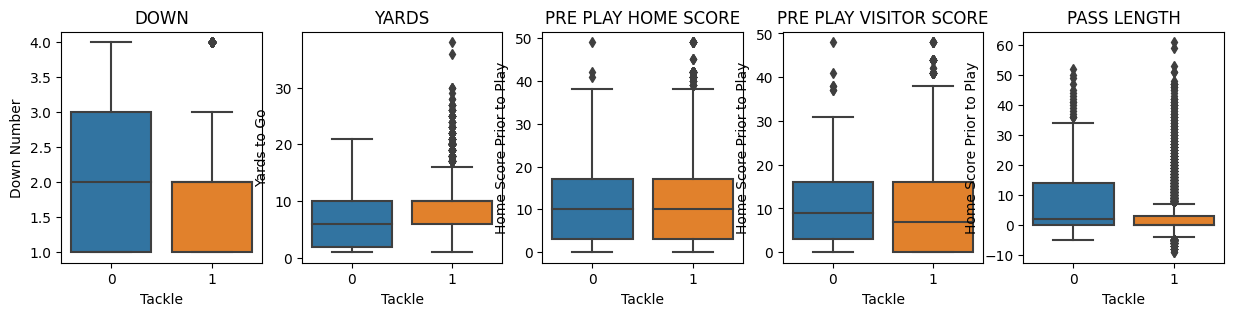

In [ ]:
data = pd.DataFrame({'Weight': df.down, 'Binary Variable': df.tackle})
data2 = pd.DataFrame({'Weight': df.yardsToGo, 'Binary Variable': df.tackle})
data3 = pd.DataFrame({'Weight': df.preSnapHomeScore, 'Binary Variable': df.tackle})
data4 = pd.DataFrame({'Weight': df.preSnapVisitorScore, 'Binary Variable': df.tackle})
data5 = pd.DataFrame({'Weight': df.passLength, 'Binary Variable': df.tackle})

# Plotting a violin plot
plt.figure(figsize=(15, 3))

plt.subplot(1,5,1)
sns.boxplot(x='Binary Variable', y='Weight', data=data)
plt.xlabel('Tackle')
plt.ylabel('Down Number')
plt.title('DOWN')

plt.subplot(1,5,2)
sns.boxplot(x='Binary Variable', y='Weight', data=data2)
plt.xlabel('Tackle')
plt.ylabel('Yards to Go')
plt.title('YARDS')

plt.subplot(1,5,3)
sns.boxplot(x='Binary Variable', y='Weight', data=data3)
plt.xlabel('Tackle')
plt.ylabel('Home Score Prior to Play')
plt.title('PRE PLAY HOME SCORE')

plt.subplot(1,5,4)
sns.boxplot(x='Binary Variable', y='Weight', data=data4)
plt.xlabel('Tackle')
plt.ylabel('Home Score Prior to Play')
plt.title('PRE PLAY VISITOR SCORE')

plt.subplot(1,5,5)
sns.boxplot(x='Binary Variable', y='Weight', data=data5)
plt.xlabel('Tackle')
plt.ylabel('Home Score Prior to Play')
plt.title('PASS LENGTH')

plt.show()

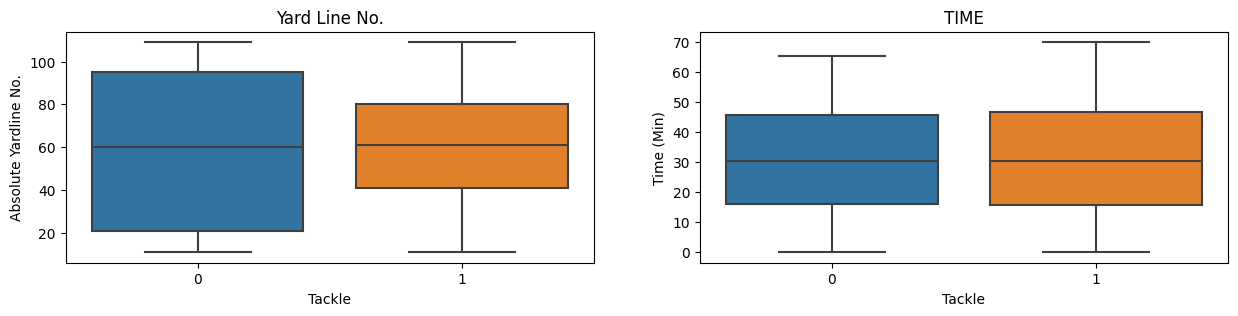

In [ ]:

data6 = pd.DataFrame({'Weight': df.absoluteYardlineNumber, 'Binary Variable': df.tackle})
data7 = pd.DataFrame({'Weight': df.TimeInSec /60, 'Binary Variable': df.tackle})
plt.figure(figsize=(15, 3))

plt.subplot(1,2,1)
sns.boxplot(x='Binary Variable', y='Weight', data=data6)
plt.xlabel('Tackle')
plt.ylabel('Absolute Yardline No.')
plt.title('Yard Line No.')

plt.subplot(1,2,2)
sns.boxplot(x='Binary Variable', y='Weight', data=data7)
plt.xlabel('Tackle')
plt.ylabel('Time (Min)')
plt.title('TIME')

plt.show()

In [ ]:
df.head()

,down,yardsToGo,preSnapHomeScore,preSnapVisitorScore,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,homeTeamWinProbabilityAdded,expectedPoints,expectedPointsAdded,TimeInSec,EMPTY,I_FORM,JUMBO,PISTOL,SHOTGUN,SINGLEBACK,WILDCAT,C,I,R,tackle,uniqueId,carrierWeight,carrierHeight,carrierAge
0,1,10,21,7,6.0,0.0,9,9,0,69,7.0,0.747284,0.976785,-0.006110,2.360609,0.981955,3172,0,0,0,0,1,0,0,1,0,0,1,20221009083537,261,75,27.0
1,1,10,14,20,0.0,0.0,3,3,0,76,7.0,0.416454,0.160485,-0.010865,1.733344,-0.263424,3158,0,0,0,0,1,0,0,0,1,0,1,20220911033126,227,76,24.0
2,2,5,10,3,11.0,0.0,15,15,0,40,6.0,0.267933,0.756661,-0.037409,1.312855,1.133666,1437,0,1,0,0,0,0,0,1,0,0,1,20220911111148,255,78,30.0
3,2,10,19,16,0.0,0.0,7,7,0,47,6.0,0.592704,0.620552,-0.002451,1.641006,-0.043580,2592,0,0,0,0,0,1,0,0,1,0,1,20221002122007,205,70,27.0
4,1,10,7,7,0.0,0.0,3,3,0,75,7.0,0.470508,0.836290,0.001053,3.686428,-0.167903,1413,0,1,0,0,0,0,0,0,1,0,1,20220919001372,203,67,25.0


In [ ]:
df = df.drop('uniqueId', axis = 1)

In [ ]:
df.head()

,down,yardsToGo,preSnapHomeScore,preSnapVisitorScore,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,homeTeamWinProbabilityAdded,expectedPoints,expectedPointsAdded,TimeInSec,EMPTY,I_FORM,JUMBO,PISTOL,SHOTGUN,SINGLEBACK,WILDCAT,C,I,R,tackle,carrierWeight,carrierHeight,carrierAge
0,1,10,21,7,6.0,0.0,9,9,0,69,7.0,0.747284,0.976785,-0.006110,2.360609,0.981955,3172,0,0,0,0,1,0,0,1,0,0,1,261,75,27.0
1,1,10,14,20,0.0,0.0,3,3,0,76,7.0,0.416454,0.160485,-0.010865,1.733344,-0.263424,3158,0,0,0,0,1,0,0,0,1,0,1,227,76,24.0
2,2,5,10,3,11.0,0.0,15,15,0,40,6.0,0.267933,0.756661,-0.037409,1.312855,1.133666,1437,0,1,0,0,0,0,0,1,0,0,1,255,78,30.0
3,2,10,19,16,0.0,0.0,7,7,0,47,6.0,0.592704,0.620552,-0.002451,1.641006,-0.043580,2592,0,0,0,0,0,1,0,0,1,0,1,205,70,27.0
4,1,10,7,7,0.0,0.0,3,3,0,75,7.0,0.470508,0.836290,0.001053,3.686428,-0.167903,1413,0,1,0,0,0,0,0,0,1,0,1,203,67,25.0


In [ ]:
df.isna().sum()

down                               0
yardsToGo                          0
preSnapHomeScore                   0
preSnapVisitorScore                0
passLength                         0
penaltyYards                       0
prePenaltyPlayResult               0
playResult                         0
playNullifiedByPenalty             0
absoluteYardlineNumber             0
defendersInTheBox                  5
passProbability                  337
preSnapHomeTeamWinProbability      0
homeTeamWinProbabilityAdded        0
expectedPoints                     0
expectedPointsAdded                1
TimeInSec                          0
EMPTY                              0
I_FORM                             0
JUMBO                              0
PISTOL                             0
SHOTGUN                            0
SINGLEBACK                         0
WILDCAT                            0
C                                  0
I                                  0
R                                  0
t

In [ ]:
df.fillna(0, inplace = True)
df.isna().sum()

down                             0
yardsToGo                        0
preSnapHomeScore                 0
preSnapVisitorScore              0
passLength                       0
penaltyYards                     0
prePenaltyPlayResult             0
playResult                       0
playNullifiedByPenalty           0
absoluteYardlineNumber           0
defendersInTheBox                0
passProbability                  0
preSnapHomeTeamWinProbability    0
homeTeamWinProbabilityAdded      0
expectedPoints                   0
expectedPointsAdded              0
TimeInSec                        0
EMPTY                            0
I_FORM                           0
JUMBO                            0
PISTOL                           0
SHOTGUN                          0
SINGLEBACK                       0
WILDCAT                          0
C                                0
I                                0
R                                0
tackle                           0
carrierWeight       

Understanding drawn from game.

Drop Columns -> passProbability, preSnapHomeTeamWinProbability, homeTeamWinProbabilityAdded, expectedPoints, expectedPointsAdded, playNullifiedByPenalty, prePenaltyPlayResult, playResult

In [ ]:
df = df.drop(['passProbability','preSnapHomeTeamWinProbability','homeTeamWinProbabilityAdded','expectedPoints',
              'expectedPointsAdded','playNullifiedByPenalty','prePenaltyPlayResult','playResult'], axis = 1)

In [ ]:
X= df.drop('tackle', axis = 1)
y = df.tackle

In [ ]:
data = pd.concat([X, y], axis=1)

# Calculate Pearson correlation coefficients
correlations = data.corr()['tackle']

# Print correlations
print(correlations)

down                     -0.036840
yardsToGo                 0.106111
preSnapHomeScore          0.001605
preSnapVisitorScore      -0.004050
passLength               -0.165889
penaltyYards              0.014454
absoluteYardlineNumber    0.009952
defendersInTheBox        -0.079198
TimeInSec                 0.000291
EMPTY                    -0.001040
I_FORM                    0.003722
JUMBO                    -0.083382
PISTOL                    0.000230
SHOTGUN                  -0.007235
SINGLEBACK                0.026527
WILDCAT                  -0.014235
C                        -0.061441
I                         0.059132
R                         0.005328
carrierWeight             0.030162
carrierHeight            -0.040474
carrierAge               -0.028026
tackle                    1.000000
Name: tackle, dtype: float64


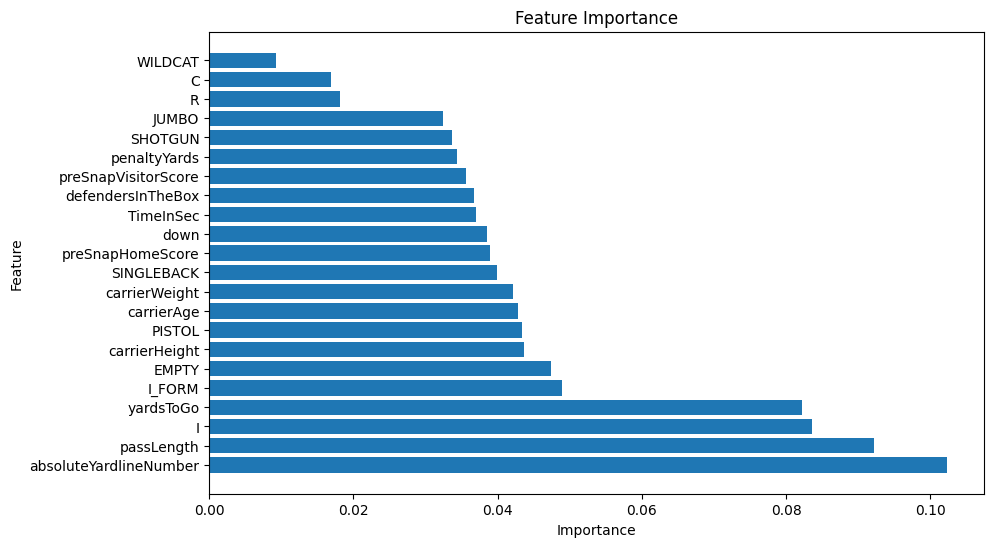

Confusion Matrix for XGBoost:
          Predicted 0  Predicted 1
Actual 0           13           79
Actual 1           14         2392


Percentage of Predicted 0s matching Actual 0s: 14.13%


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming you have features (X) and labels (y) for a binary classification task
#X, y = your_data_here  # Replace with your actual data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Train the XGBoost model on the normalized training data
xgb_classifier.fit(X_train_scaled, y_train)

# Plot feature importance
importances = xgb_classifier.feature_importances_
feature_names = X.columns

# Create a DataFrame for better handling of feature names and importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Make predictions on the normalized test set
y_pred_xgb = xgb_classifier.predict(X_test_scaled)

# Obtain the confusion matrix for XGBoost
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
conf_df_xgb = pd.DataFrame(conf_matrix_xgb, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Print the confusion matrix for XGBoost
print("Confusion Matrix for XGBoost:")
print(conf_df_xgb)
print("\n")

# Calculate the percentage of predicted 0s that match the actual 0s
true_negatives = conf_matrix_xgb[0, 0]
total_predicted_zeros = conf_matrix_xgb[0, :].sum()

percentage_matching_zeros = (true_negatives / total_predicted_zeros) * 100

print(f"Percentage of Predicted 0s matching Actual 0s: {percentage_matching_zeros:.2f}%")


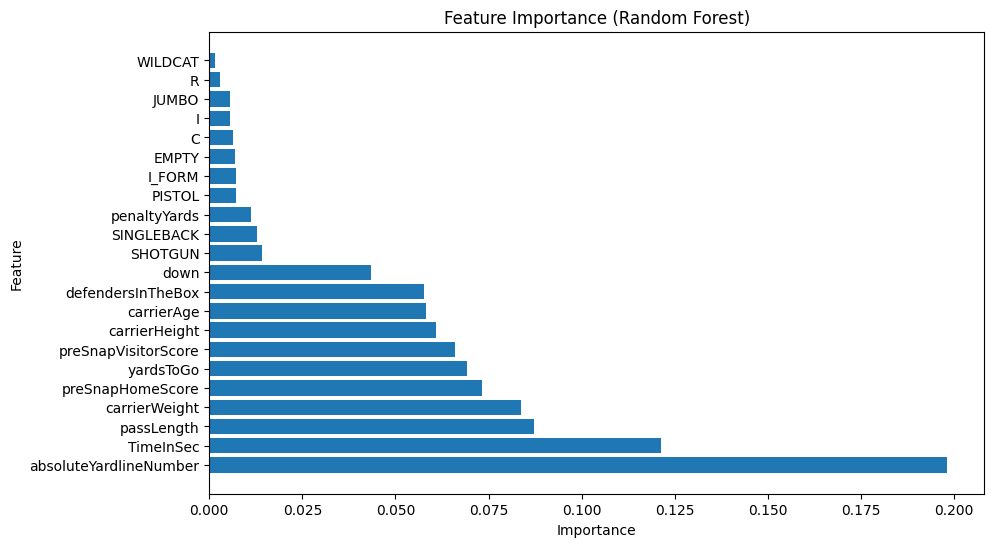

Confusion Matrix for Random Forest:
          Predicted 0  Predicted 1
Actual 0            6           86
Actual 1            6         2400


Percentage of Predicted 0s matching Actual 0s: 6.52%


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming you have features (X) and labels (y) for a binary classification task
#X, y = your_data_here  # Replace with your actual data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest model on the normalized training data
rf_classifier.fit(X_train_scaled, y_train)

# Plot feature importance
importances = rf_classifier.feature_importances_
feature_names = X.columns

# Create a DataFrame for better handling of feature names and importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Random Forest)')
plt.show()

# Make predictions on the normalized test set
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Obtain the confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_df_rf = pd.DataFrame(conf_matrix_rf, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Print the confusion matrix for Random Forest
print("Confusion Matrix for Random Forest:")
print(conf_df_rf)
print("\n")

# Calculate the percentage of predicted 0s that match the actual 0s
true_negatives = conf_matrix_rf[0, 0]
total_predicted_zeros = conf_matrix_rf[0, :].sum()

percentage_matching_zeros = (true_negatives / total_predicted_zeros) * 100

print(f"Percentage of Predicted 0s matching Actual 0s: {percentage_matching_zeros:.2f}%")


In [ ]:
#from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import confusion_matrix
#import pandas as pd

# Assuming you have features (X) and labels (y) for a binary classification task
#X, y = your_data_here  # Replace with your actual data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test)

# Obtain the confusion matrix for Logistic Regression
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
conf_df_logreg = pd.DataFrame(conf_matrix_logreg, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Print the confusion matrix for Logistic Regression
print("Confusion Matrix for Logistic Regression:")
print(conf_df_logreg)
print("\n")

# Calculate the percentage of predicted 0s that match the actual 0s
true_negatives = conf_matrix_logreg[0, 0]
total_predicted_zeros = conf_matrix_logreg[0, :].sum()

percentage_matching_zeros = (true_negatives / total_predicted_zeros) * 100

print(f"Percentage of Predicted 0s matching Actual 0s: {percentage_matching_zeros:.2f}%")


Confusion Matrix for Logistic Regression:
          Predicted 0  Predicted 1
Actual 0            2           90
Actual 1            3         2403


Percentage of Predicted 0s matching Actual 0s: 2.17%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


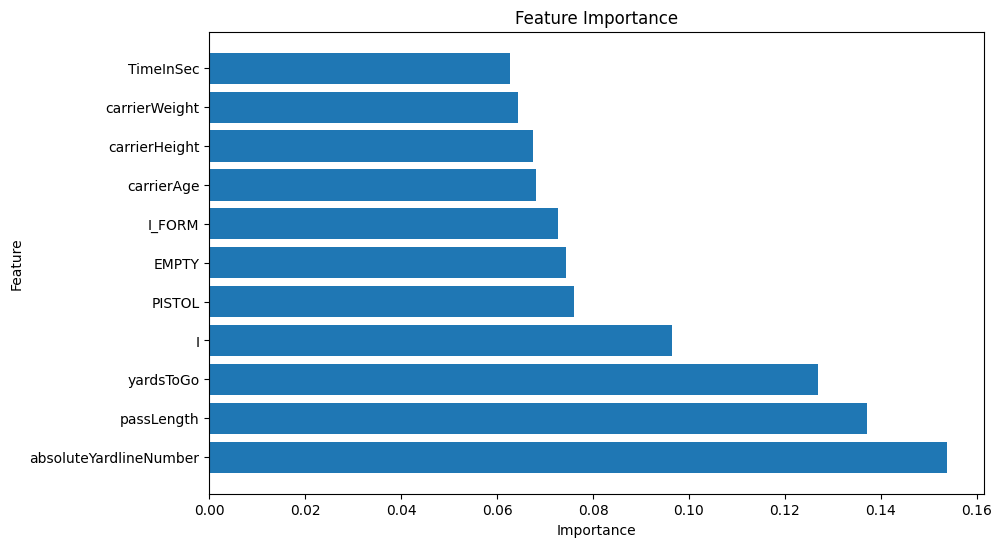

Confusion Matrix for XGBoost:
          Predicted 0  Predicted 1
Actual 0           13           79
Actual 1           22         2384


Percentage of Predicted 0s matching Actual 0s: 14.13%


In [ ]:
df_log = df[['passLength','TimeInSec','absoluteYardlineNumber','yardsToGo','I','I_FORM','EMPTY','carrierHeight','PISTOL','carrierAge','carrierWeight']]
#df_log.head()
X1 = df_log
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Train the XGBoost model on the normalized training data
xgb_classifier.fit(X_train_scaled, y_train)

# Plot feature importance
importances = xgb_classifier.feature_importances_
feature_names = X1.columns

# Create a DataFrame for better handling of feature names and importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Make predictions on the normalized test set
y_pred_xgb = xgb_classifier.predict(X_test_scaled)

# Obtain the confusion matrix for XGBoost
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
conf_df_xgb = pd.DataFrame(conf_matrix_xgb, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Print the confusion matrix for XGBoost
print("Confusion Matrix for XGBoost:")
print(conf_df_xgb)
print("\n")

# Calculate the percentage of predicted 0s that match the actual 0s
true_negatives = conf_matrix_xgb[0, 0]
total_predicted_zeros = conf_matrix_xgb[0, :].sum()

percentage_matching_zeros = (true_negatives / total_predicted_zeros) * 100

print(f"Percentage of Predicted 0s matching Actual 0s: {percentage_matching_zeros:.2f}%")


In [ ]:
data = pd.concat([X, y], axis=1)

# Calculate Pearson correlation coefficients
correlations = data.corr()['tackle']

# Print correlations
print(correlations)

down                     -0.036840
yardsToGo                 0.106111
preSnapHomeScore          0.001605
preSnapVisitorScore      -0.004050
passLength               -0.165889
penaltyYards              0.014454
absoluteYardlineNumber    0.009952
defendersInTheBox        -0.079198
TimeInSec                 0.000291
EMPTY                    -0.001040
I_FORM                    0.003722
JUMBO                    -0.083382
PISTOL                    0.000230
SHOTGUN                  -0.007235
SINGLEBACK                0.026527
WILDCAT                  -0.014235
C                        -0.061441
I                         0.059132
R                         0.005328
carrierWeight             0.030162
carrierHeight            -0.040474
carrierAge               -0.028026
tackle                    1.000000
Name: tackle, dtype: float64


# MOST INFLUENTIAL VARIABLES PREDICTING A TACKLE (Top 15)

1) Absolute Yardline Number (Directly proportional)
-> Further the ball is, more the chances are to witness a successful tackle

2) Pass Length              (Inversely Proportional)
-> Longer the pass, less are the chances of being tackled

3) I                        (Directly Proportional)
-> The formation sees more tackles against it

4) Yards to Go              (Directly Proportional)
-> Further the offensive team, greater the chances of being tackled

5) I_FORM                   (Directly Proportional)

6) EMPTY                    (Inversely Proportional)

7) Carrier Height           (Inversely Proportional)
-> Shorter athletes seem to be good at slipping past the defense

8) PISTOL                   (Directly Proportional)

9) Carrier Age              (Inversely Proportional)
-> Younger athletes perform better

10) Carrier Weight          (Directly Proportional)
-> Heavier athletes are better at handling pushes and pulls?

11) SINGLEBACK              (Directly Porportional)

12) Pre Snap Home Score     (Directly Proportional)

13) Down                    (Inversely Proportional)
-> More tackles seem to happen in later downs

14) Time in Sec             (Directly Proportional)
-> More tackles can be observed in the later game

15) Defenders in Box        (Inversely Proportional)
-> More defenders should be deployed well ahead of the scrimage line. However, this is vulnerable against long throws.
